# Dimensionality Reduction techniques

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment11/Dimensionality_reduction_1.ipynb)


In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# First, let's load the dataset to understand its structure and contents.
import pandas as pd

# Load the dataset
file_path = '/content/gdrive/MyDrive/DataMining/booking.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [3]:
from sklearn.preprocessing import OneHotEncoder

# Identifying categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
# Removing the 'Booking_ID' as it's a unique identifier, not a feature
categorical_cols.remove('Booking_ID')

# Applying one-hot encoding
encoder = OneHotEncoder(sparse=False)
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_cols]))
encoded_data.columns = encoder.get_feature_names_out(categorical_cols)

# Drop original categorical columns and concatenate the encoded ones
data_preprocessed = data.drop(categorical_cols, axis=1)
data_preprocessed = pd.concat([data_preprocessed, encoded_data], axis=1)

# Display the first few rows of the preprocessed dataset
data_preprocessed.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,...,date of reservation_9/6/2017,date of reservation_9/6/2018,date of reservation_9/7/2017,date of reservation_9/7/2018,date of reservation_9/8/2017,date of reservation_9/8/2018,date of reservation_9/9/2017,date of reservation_9/9/2018,booking status_Canceled,booking status_Not_Canceled
0,INN00001,1,1,2,5,0,224,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,INN00002,1,0,1,3,0,5,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,INN00003,2,1,1,3,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,INN00004,1,0,0,2,0,211,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,INN00005,1,0,1,2,0,48,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
# Checking for missing values in the dataset
missing_values = data_preprocessed.isnull().sum()
missing_values = missing_values[missing_values > 0]

missing_values_summary = {
    "total_missing_values": missing_values.sum(),
    "missing_columns": missing_values.index.tolist(),
    "missing_values_per_column": missing_values.to_dict()
}

missing_values_summary


{'total_missing_values': 0,
 'missing_columns': [],
 'missing_values_per_column': {}}

In [5]:
!pip install umap-learn

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import MDS, Isomap, TSNE, LocallyLinearEmbedding
import umap

# Principal Component Analysis (PCA):
PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize by reducing the number of variables. PCA works by identifying the axes that maximize the variance in the data.

Strengths: Works well when linear relationships dominate your data.

Limitations: PCA struggles with non-linear relationships.

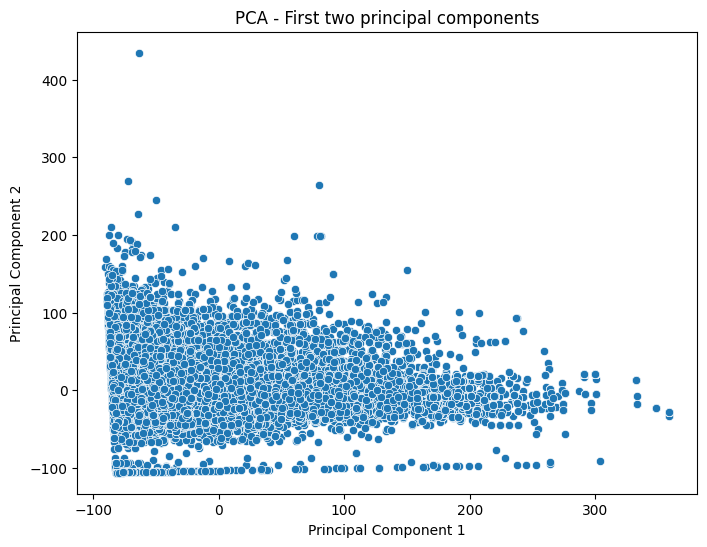

0.9989145454514504

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Removing the 'Booking_ID' column as it's a unique identifier, not a feature
data_for_pca = data_preprocessed.drop('Booking_ID', axis=1)

# Applying PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_for_pca)

# Creating a DataFrame for the PCA result for visualization
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])

# Plotting the result
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('PCA - First two principal components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Variance captured by the first two components
variance_captured = pca.explained_variance_ratio_.sum()
variance_captured


# Singular Value Decomposition (SVD):
SVD is a matrix factorization method used in many signal processing and statistics applications. In the context of dimensionality reduction, it decomposes the original data into singular vectors and singular values, identifying the directions of maximum variance.

Strengths: Similar to PCA, good for linear relationships.

Limitations: Like PCA, it fails with non-linear data.



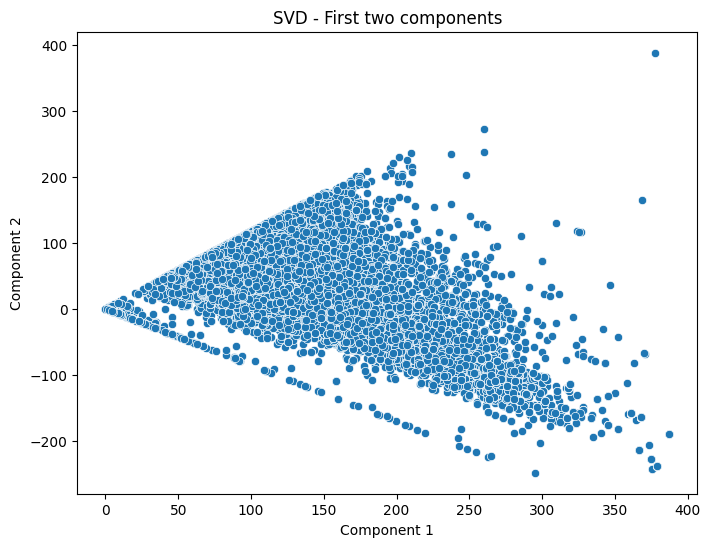

0.9988132341883348

In [8]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


np.random.seed(42)  # For reproducibility
sampled_data = data_for_pca

# Applying Truncated SVD
svd = TruncatedSVD(n_components=2)
svd_result = svd.fit_transform(sampled_data)

# Visualizing the result
svd_df = pd.DataFrame(data=svd_result, columns=['SVD1', 'SVD2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SVD1', y='SVD2', data=svd_df)
plt.title('SVD - First two components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

# Variance captured by the first two components
variance_captured = svd.explained_variance_ratio_.sum()
variance_captured

# Multidimensional Scaling (MDS):
 MDS is a technique used for visualizing the level of similarity of individual cases of a dataset. It attempts to model similarity or dissimilarity data as distances in a geometric space. The goal is to place each object in an N-dimensional space such that the between-object distances are preserved as well as possible.

 Strengths: Effective in capturing the true distances between points in high-dimensional space.

Limitations: Computationally expensive and may not perform well when there are too many dimensions.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


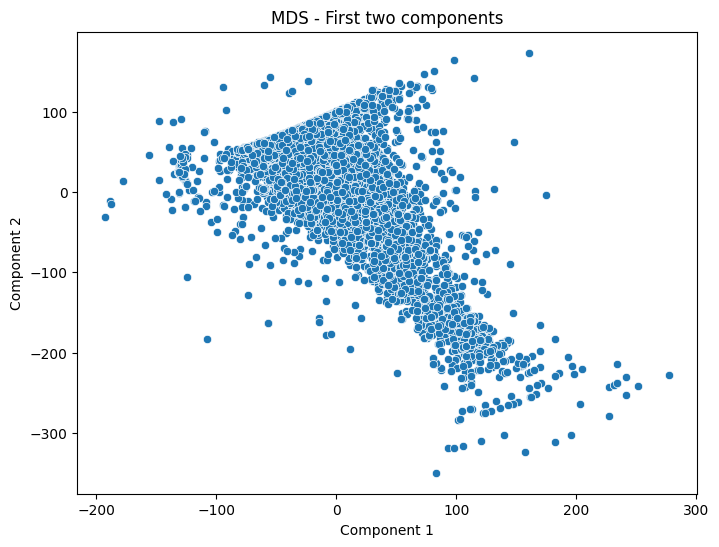

In [11]:
from sklearn.manifold import MDS

# Sample a smaller subset of your data
sampled_data_small = sampled_data.sample(frac=0.20, random_state=42)  # Adjust the fraction as needed

# Applying MDS with adjusted parameters
mds = MDS(n_components=2, max_iter=100, n_init=1, random_state=42)
mds_result = mds.fit_transform(sampled_data_small)

# Visualizing the result
mds_df = pd.DataFrame(data=mds_result, columns=['MDS1', 'MDS2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MDS1', y='MDS2', data=mds_df)
plt.title('MDS - First two components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


# ISOMap (Isometric Mapping):
ISOMap is a non-linear dimensionality reduction method. It is one of several widely used low-dimensional embedding methods. ISOMap is used for computing a quasi-isometric, low-dimensional embedding of a set of high-dimensional data points. It attempts to preserve the geodesic distances in the lower dimension.

Strengths: Good at unfolding twisted and curved manifolds.

Limitations: Sensitive to noise and outliers.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 19 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.10/dist-package

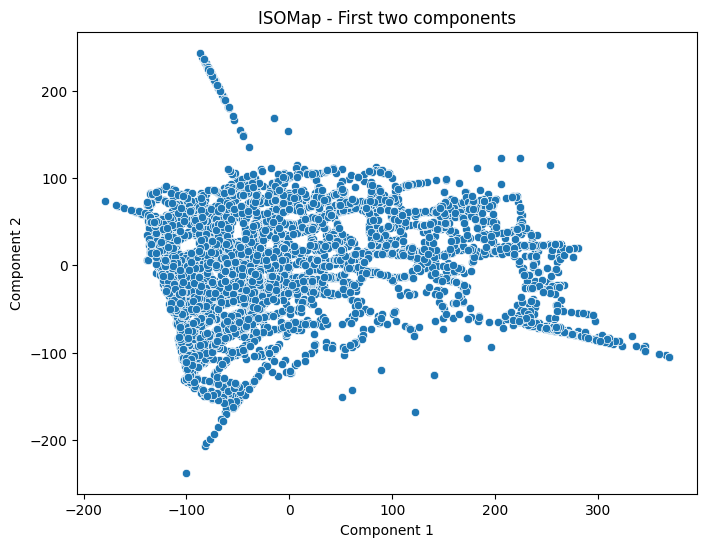

In [9]:
from sklearn.manifold import Isomap

# Applying ISOMap
isomap = Isomap(n_components=2)
sampled_data_small = sampled_data.sample(frac=0.20, random_state=42)
isomap_result = isomap.fit_transform(sampled_data_small)

# Visualizing the result
isomap_df = pd.DataFrame(data=isomap_result, columns=['ISOMap1', 'ISOMap2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ISOMap1', y='ISOMap2', data=isomap_df)
plt.title('ISOMap - First two components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


# Locally Linear Embedding (LLE):
LLE is a non-linear dimensionality reduction technique. It computes low-dimensional, neighborhood-preserving embeddings of high-dimensional inputs. It does so by first measuring how each data point linearly relates to its neighbors and then seeking low-dimensional representations that preserve these local relationships.

Strengths: Preserves local structures well.

Limitations: Can be distorted by global structure

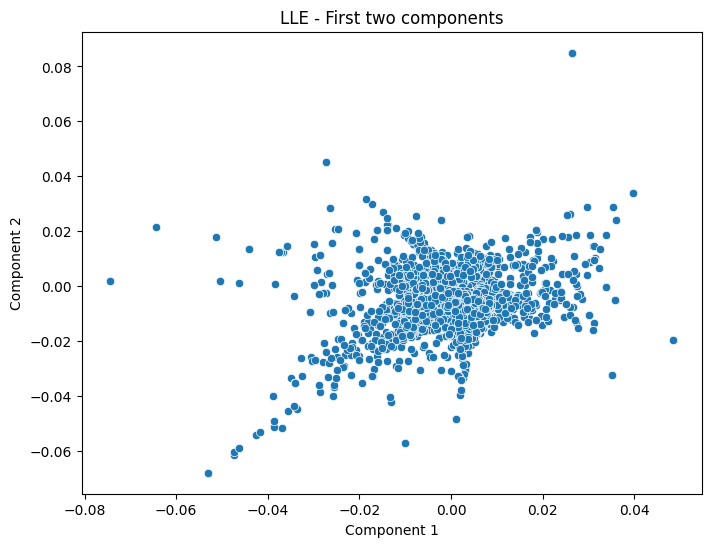

In [11]:
from sklearn.manifold import LocallyLinearEmbedding

# Adjusting parameters for LLE
lle = LocallyLinearEmbedding(n_components=2, eigen_solver='dense', n_neighbors=10, reg=0.001)

# Applying LLE
lle_result = lle.fit_transform(sampled_data_small)

# Visualizing the result
lle_df = pd.DataFrame(data=lle_result, columns=['LLE1', 'LLE2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LLE1', y='LLE2', data=lle_df)
plt.title('LLE - First two components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()



# UMAP (Uniform Manifold Approximation and Projection):
UMAP is a non-linear dimensionality reduction technique that is particularly effective for large datasets. It is based on manifold learning techniques and topological data analysis. UMAP is used for visualization, noise reduction, and clustering.

Strengths: Effective in revealing structures at many scales.

Limitations: Can produce misleading results if hyperparameters are not chosen carefully.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


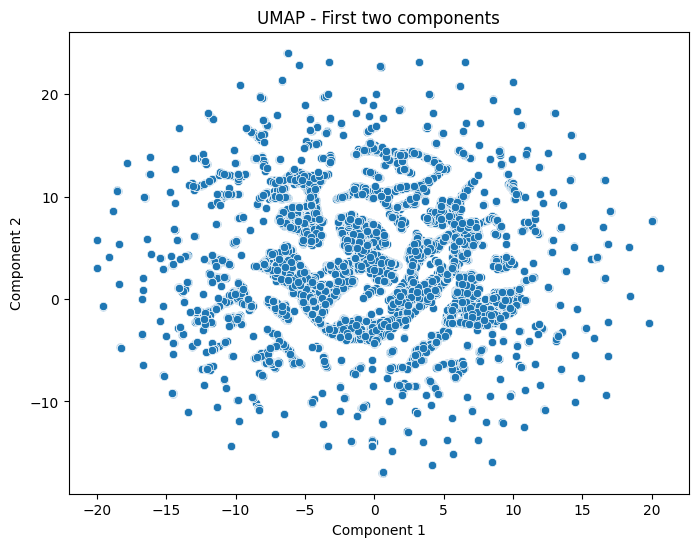

In [12]:
import umap

# Applying UMAP
umap_model = umap.UMAP(n_components=2)
umap_result = umap_model.fit_transform(sampled_data)

# Visualizing the result
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', data=umap_df)
plt.title('UMAP - First two components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


# t-SNE (t-Distributed Stochastic Neighbor Embedding):
t-SNE is a tool to visualize high-dimensional data by reducing it to a lower-dimensional space. It converts similarities between data points to joint probabilities and tries to minimize the divergence between these joint probabilities (or similarities) in the original high-dimensional space and the reduced low-dimensional space.

Strengths: Excellent for clustering and visualizing clusters in high-dimensional data.

Limitations: Sensitive to hyperparameters, particularly perplexity; computationally intensive.

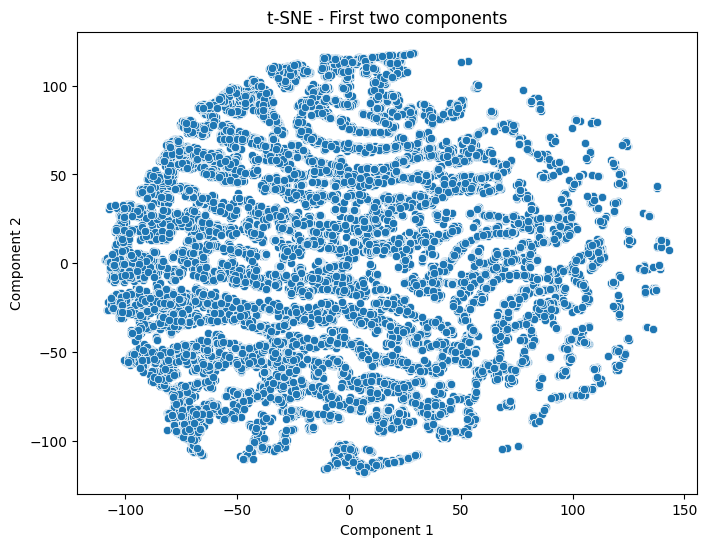

In [13]:
from sklearn.manifold import TSNE

# Applying t-SNE
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(sampled_data)

# Visualizing the result
tsne_df = pd.DataFrame(data=tsne_result, columns=['tSNE1', 'tSNE2'])
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tSNE1', y='tSNE2', data=tsne_df)
plt.title('t-SNE - First two components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
